# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [16]:
# Dependencies and Setup

import sys
!{sys.executable} -m pip install citipy

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import seaborn as sns

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [17]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
valid_lat= []
valid_lang= []
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        valid_lat.append(lat_lng[0])
        valid_lang.append(lat_lng[1])
# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [18]:
#http://api.openweathermap.org/data/2.5/weather?lat=35&lon=139&appid=f55a8c7c8d1fc7575c40013616c13f25&units=metric
"""
{  
   "coord":{  
      "lon":-73.99,
      "lat":40.73
   },
   "weather":[  
      {  
         "id":803,
         "main":"Clouds",
         "description":"broken clouds",
         "icon":"04n"
      }
   ],
   "base":"stations",
   "main":{  
      "temp":275.93,
      "pressure":1027,
      "humidity":35,
      "temp_min":273.15,
      "temp_max":278.71
   },
   "visibility":16093,
   "wind":{  
      "speed":2.27,
      "deg":204.504
   },
   "clouds":{  
      "all":75
   },
   "dt":1552962588,
   "sys":{  
      "type":1,
      "id":4686,
      "message":0.0099,
      "country":"US",
      "sunrise":1552906985,
      "sunset":1552950306
   },
   "id":5128581,
   "name":"New York",
   "cod":200
}

"""
urlPart = "http://api.openweathermap.org/data/2.5/weather?q="
secondPart = "&appid="+str(api_key)+"&units=metric"

finalCsv = "City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed"+"\n"
OverallList = []
indexForSubCount = 0
for city in cities:
    if indexForSubCount < 10:
        print("checking for "+city)
    jsonData = requests.get(urlPart+city+secondPart).json()
    indexForSubCount = indexForSubCount + 1
    if jsonData['cod'] == 200 :
        if indexForSubCount < 10:
            print("city is good to go")
        City=jsonData["name"]
        Cloudiness=jsonData["clouds"]["all"]
        Country=jsonData["sys"]["country"]
        Date=jsonData["dt"]
        Humidity=jsonData["main"]["humidity"]
        Lat= jsonData["coord"]["lon"]
        Lng=jsonData["coord"]["lat"]
        Max_Temp=jsonData["main"]["temp_max"]
        Wind_Speed=jsonData["wind"]["speed"]
        OverallList.append([City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed])
    else:
        if indexForSubCount < 10:
            print("City not found. Skipping...")
    
    



checking for codrington
city is good to go
checking for ushuaia
city is good to go
checking for ozgon
City not found. Skipping...
checking for bull savanna
city is good to go
checking for dikson
city is good to go
checking for new norfolk
city is good to go
checking for jamestown
city is good to go
checking for clinton
city is good to go
checking for shimoda
city is good to go
checking for port alfred


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
#"City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed"
dataFrameWithData = pd.DataFrame(OverallList,
                                 columns = ["City","Cloudiness",
                                            "Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed"])
dataFrameWithData.to_csv("output.csv", sep='\t')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

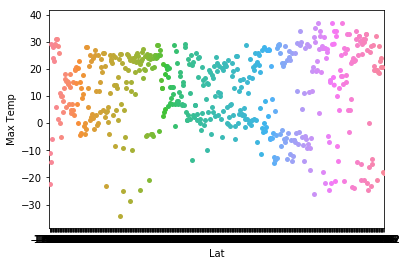

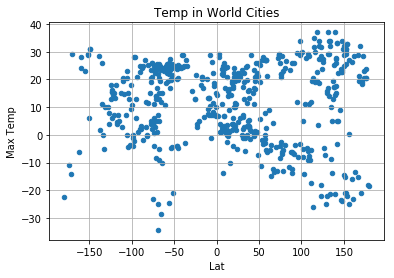

In [20]:
#plt.plot(dataFrameWithData['Lat'], dataFrameWithData["Max Temp"], 'o', color='black');
#plt.xlabel('latitude', fontsize=18)
#plt.ylabel('temperature', fontsize=16)

sns.swarmplot(x='Lat', y='Max Temp', data=dataFrameWithData[['Max Temp','Lat']])
plt.figure(1)

dataFrameWithData[['Max Temp','Lat']].plot(
    kind='scatter', 
    x='Lat', 
    y='Max Temp', 
    title='Temp in World Cities', 
    grid=True,
)


#### Latitude vs. Humidity Plot

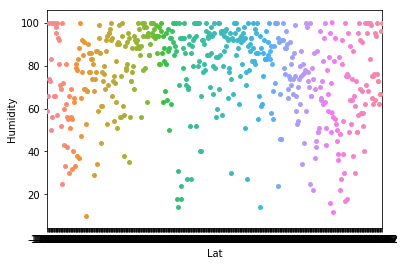

<Figure size 432x288 with 0 Axes>

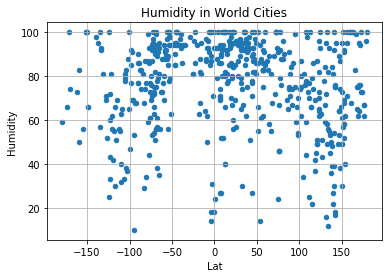

In [21]:
plt.figure(2)
sns.swarmplot(x='Lat', y='Humidity', data=dataFrameWithData[['Humidity','Lat']])

plt.figure(3)

dataFrameWithData[['Humidity','Lat']].plot(
    kind='scatter', 
    x='Lat', 
    y='Humidity', 
    title='Humidity in World Cities', 
    grid=True,
)

#### Latitude vs. Cloudiness Plot

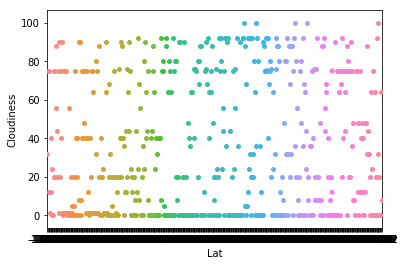

<Figure size 432x288 with 0 Axes>

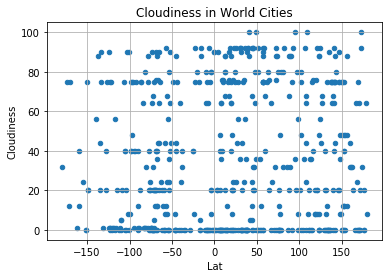

In [22]:
plt.figure(4)
sns.swarmplot(x='Lat', y='Cloudiness', data=dataFrameWithData[['Cloudiness','Lat']])

plt.figure(5)

dataFrameWithData[['Cloudiness','Lat']].plot(
    kind='scatter', 
    x='Lat', 
    y='Cloudiness', 
    title='Cloudiness in World Cities', 
    grid=True,
)


#### Latitude vs. Wind Speed Plot

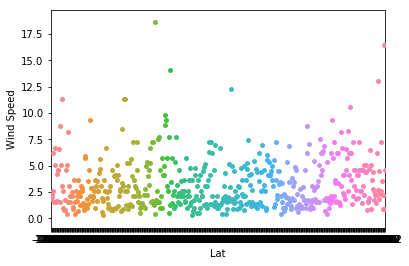

<Figure size 432x288 with 0 Axes>

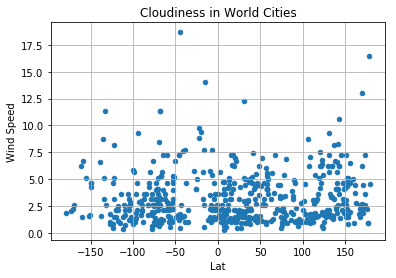

In [23]:
plt.figure(6)

sns.swarmplot(x='Lat', y='Wind Speed', data=dataFrameWithData[['Wind Speed','Lat']])

plt.figure(7)

dataFrameWithData[['Wind Speed','Lat']].plot(
    kind='scatter', 
    x='Lat', 
    y='Wind Speed', 
    title='Cloudiness in World Cities', 
    grid=True,
)
